In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import json 
import os
import cv2
from tqdm import tqdm

In [ ]:
measurement_dir_names = ['FHL', 'MLML', 'SSL'] ## names of the folders inside the measurement directory
measurement_dirs = []

verbose = True

id_dirs = []
ids = []
lab_names = []

for measurement_dir_name in measurement_dir_names:
    if verbose:
        print(measurement_dir_name)
    measurement_dir = f'../../measurements/{measurement_dir_name}/knownID'
    if os.path.exists(measurement_dir) != True:
        print(f'measurement dir {measurement_dir} DOES NOT EXIST!')
        print(f'please check that you have set up the notebook correctly')
    
    for dir_name in os.listdir(measurement_dir):
        dir_path = os.path.join(measurement_dir, dir_name)
        if os.path.isdir(dir_path):
            if dir_name != 'inputIDcode': ## remove development folder
                id_dirs.append(dir_path)
                if verbose:
                    print(dir_path)
                ids.append(dir_name)
                lab_names.append(measurement_dir_name)

FHL
../../measurements/FHL/knownID\sp1
../../measurements/FHL/knownID\sp10
../../measurements/FHL/knownID\sp11
../../measurements/FHL/knownID\sp12
../../measurements/FHL/knownID\sp13
../../measurements/FHL/knownID\sp14
../../measurements/FHL/knownID\sp15
../../measurements/FHL/knownID\sp16
../../measurements/FHL/knownID\sp17
../../measurements/FHL/knownID\sp18
../../measurements/FHL/knownID\sp19
../../measurements/FHL/knownID\sp2
../../measurements/FHL/knownID\sp20
../../measurements/FHL/knownID\sp21
../../measurements/FHL/knownID\sp22
../../measurements/FHL/knownID\sp23
../../measurements/FHL/knownID\sp24
../../measurements/FHL/knownID\sp25
../../measurements/FHL/knownID\sp26
../../measurements/FHL/knownID\sp27
../../measurements/FHL/knownID\sp28
../../measurements/FHL/knownID\sp29
../../measurements/FHL/knownID\sp3
../../measurements/FHL/knownID\sp30
../../measurements/FHL/knownID\sp31
../../measurements/FHL/knownID\sp32
../../measurements/FHL/knownID\sp33
../../measurements/FHL/know

In [ ]:
data = {'lab':[], 'id':[], 'measurement_day':[], 'morphometrics_path':[]}
verbose = False
for lab, id_dir, id in zip(lab_names, id_dirs, ids):
    if verbose:
        print(id)
    for day_name in os.listdir(id_dir):
        day_dir = os.path.join(id_dir, day_name)
        if os.path.isdir(day_dir) != True:
            continue
        if verbose:
            print('\t',dir_name)
        morphometrics_path = None
        for measurement_name in os.listdir(day_dir):
            measurement_dir = os.path.join(day_dir, measurement_name)
            if os.path.isdir(measurement_dir) != True:
                continue
            if verbose:
                print('\t\t', measurement_name)
            for file in os.listdir(measurement_dir):
                if verbose:
                    print('\t\t\t', file)
                if 'morphometrics.json' in file:
                    morphometrics_path = os.path.join(measurement_dir, file)
        if morphometrics_path != None:
            data['lab'].append(lab)
            data['id'].append(id)
            data['measurement_day'].append(day_name)
            data['morphometrics_path'].append(morphometrics_path)

In [156]:
data = pd.DataFrame(data)
data

,lab,id,measurement_day,morphometrics_path
0,FHL,sp1,01_24_2025,../../measurements/FHL/knownID\sp1\01_24_2025\...
1,FHL,sp10,01_24_2025,../../measurements/FHL/knownID\sp10\01_24_2025...
2,FHL,sp11,01_24_2025,../../measurements/FHL/knownID\sp11\01_24_2025...
3,FHL,sp12,01_24_2025,../../measurements/FHL/knownID\sp12\01_24_2025...
4,FHL,sp13,01_24_2025,../../measurements/FHL/knownID\sp13\01_24_2025...
...,...,...,...,...
153,SSL,Yuko,01_26_2025,../../measurements/SSL/knownID\Yuko\01_26_2025...
154,SSL,Yuko,08_20_2025,../../measurements/SSL/knownID\Yuko\08_20_2025...
155,SSL,Zeke,01_26_2025,../../measurements/SSL/knownID\Zeke\01_26_2025...
156,SSL,Zeke,02_23_2025,../../measurements/SSL/knownID\Zeke\02_23_2025...


In [157]:
from src.starMorphometricTool.utils.data_utils import (load_morphometrics, get_arm_lengths, calculate_arm_diameters)
from src.starMorphometricTool.utils.image_utils import normalize_corrected_objects

areas_mm2, minor_axes_mm, major_axes_mm = [], [], []
averages_arm_lengths, stds_arm_lengths = [], []
averages_diameters, stds_diameters = [], []
max_diameters = []
corrected_objects = []
morphometrics_list = [] 

for i, row in tqdm(data.iterrows()):
    morphometrics_path = row['morphometrics_path']
    morphometrics = load_morphometrics(morphometrics_path)
    morphometrics_list.append(morphometrics)
    
    area_mm2 = morphometrics['area_mm2']
    areas_mm2.append(area_mm2)
    length_minor_axis_mm = morphometrics['minor_axis_mm']
    minor_axes_mm.append(length_minor_axis_mm)
    length_major_axis_mm = morphometrics['major_axis_mm']
    major_axes_mm.append(length_major_axis_mm)
    
    arm_lengths = np.array(get_arm_lengths(morphometrics))
    arm_diameters = np.array(calculate_arm_diameters(morphometrics))
    max_diameter = np.max(arm_diameters)
    
    average_arm_length = np.mean(arm_lengths)
    averages_arm_lengths.append(average_arm_length)
    std_arm_lengths = np.std(arm_lengths)
    stds_arm_lengths.append(std_arm_lengths)
    average_diameter = np.mean(arm_diameters)
    max_diameters.append(max_diameter)
    averages_diameters.append(average_diameter)
    std_diameter = np.std(arm_diameters)
    stds_diameters.append(std_diameter)
    
    path_corrected_object = os.path.join(os.path.dirname(morphometrics_path), 'corrected_object.png')
    corrected_object = cv2.imread(path_corrected_object)
    corrected_object = cv2.cvtColor(corrected_object, cv2.COLOR_BGR2RGB)
    corrected_objects.append(corrected_object)
    
normalized_objects = normalize_corrected_objects(corrected_objects, morphometrics_list)

data['areas_mm2'] = areas_mm2
data['length_minor_axis_mm'] = minor_axes_mm
data['length_major_axis_mm'] = major_axes_mm
data['average_arm_length_mm'] = averages_arm_lengths
data['std_arm_length_mm'] = stds_arm_lengths
data['average_diameter'] = averages_diameters
data['std_diameter'] = stds_diameters
data['max_diameter_mm'] = max_diameters

158it [00:00, 219.27it/s]


In [158]:
from src.starMorphometricTool.utils.date_utils import convert_to_datetime64
data['measurement_day'] = [convert_to_datetime64(date) for date in data['measurement_day']]
data

,lab,id,measurement_day,morphometrics_path,areas_mm2,length_minor_axis_mm,length_major_axis_mm,average_arm_length_mm,std_arm_length_mm,average_diameter,std_diameter,max_diameter_mm
0,FHL,sp1,2025-01-24,../../measurements/FHL/knownID\sp1\01_24_2025\...,2877.735604,65.437183,74.939226,41.190542,3.864038,9.386207,2.944342,12.699714
1,FHL,sp10,2025-01-24,../../measurements/FHL/knownID\sp10\01_24_2025...,3650.190893,72.562804,79.552298,43.024704,4.275273,8.257392,2.673303,12.929795
2,FHL,sp11,2025-01-24,../../measurements/FHL/knownID\sp11\01_24_2025...,7721.929953,88.158837,129.406308,64.171067,8.851505,9.727719,4.977552,23.290529
3,FHL,sp12,2025-01-24,../../measurements/FHL/knownID\sp12\01_24_2025...,3056.115446,66.951981,79.342698,42.597592,4.044154,9.903227,2.957527,14.001331
4,FHL,sp13,2025-01-24,../../measurements/FHL/knownID\sp13\01_24_2025...,5067.563204,80.734293,102.416130,53.175476,5.509753,10.769522,3.539342,16.649776
...,...,...,...,...,...,...,...,...,...,...,...,...
153,SSL,Yuko,2025-01-26,../../measurements/SSL/knownID\Yuko\01_26_2025...,2562.183194,58.686801,68.547238,35.216763,4.370950,6.497651,4.175257,18.354848
154,SSL,Yuko,2025-08-20,../../measurements/SSL/knownID\Yuko\08_20_2025...,6182.381653,87.253390,107.209576,54.598386,5.197829,9.887089,4.859043,19.328771
155,SSL,Zeke,2025-01-26,../../measurements/SSL/knownID\Zeke\01_26_2025...,2320.477049,49.983621,67.164302,33.545854,2.555186,6.941171,4.785931,16.185642
156,SSL,Zeke,2025-02-23,../../measurements/SSL/knownID\Zeke\02_23_2025...,2136.333978,49.773159,60.707516,29.646629,3.592560,6.377309,1.787531,9.450183


In [ ]:
data_name = ''
for name in measurement_dir_names:
    data_name = data_name + name + '-'

path_data = os.path.join(f'../../measurements/{data_name[:-1]}.csv')
print(f'SAVING data to a csv stored in the measurement directory root')
print(f'CSV is called {os.path.basename(path_data)}')
print(f'full path to csv: {path_data}')
data.to_csv(path_data, index=False)

SAVING data to a csv stored in the measurement directory root
CSV is called FHL-MLML-SSL.csv
full path to csv: ../../measurements/FHL-MLML-SSL.csv


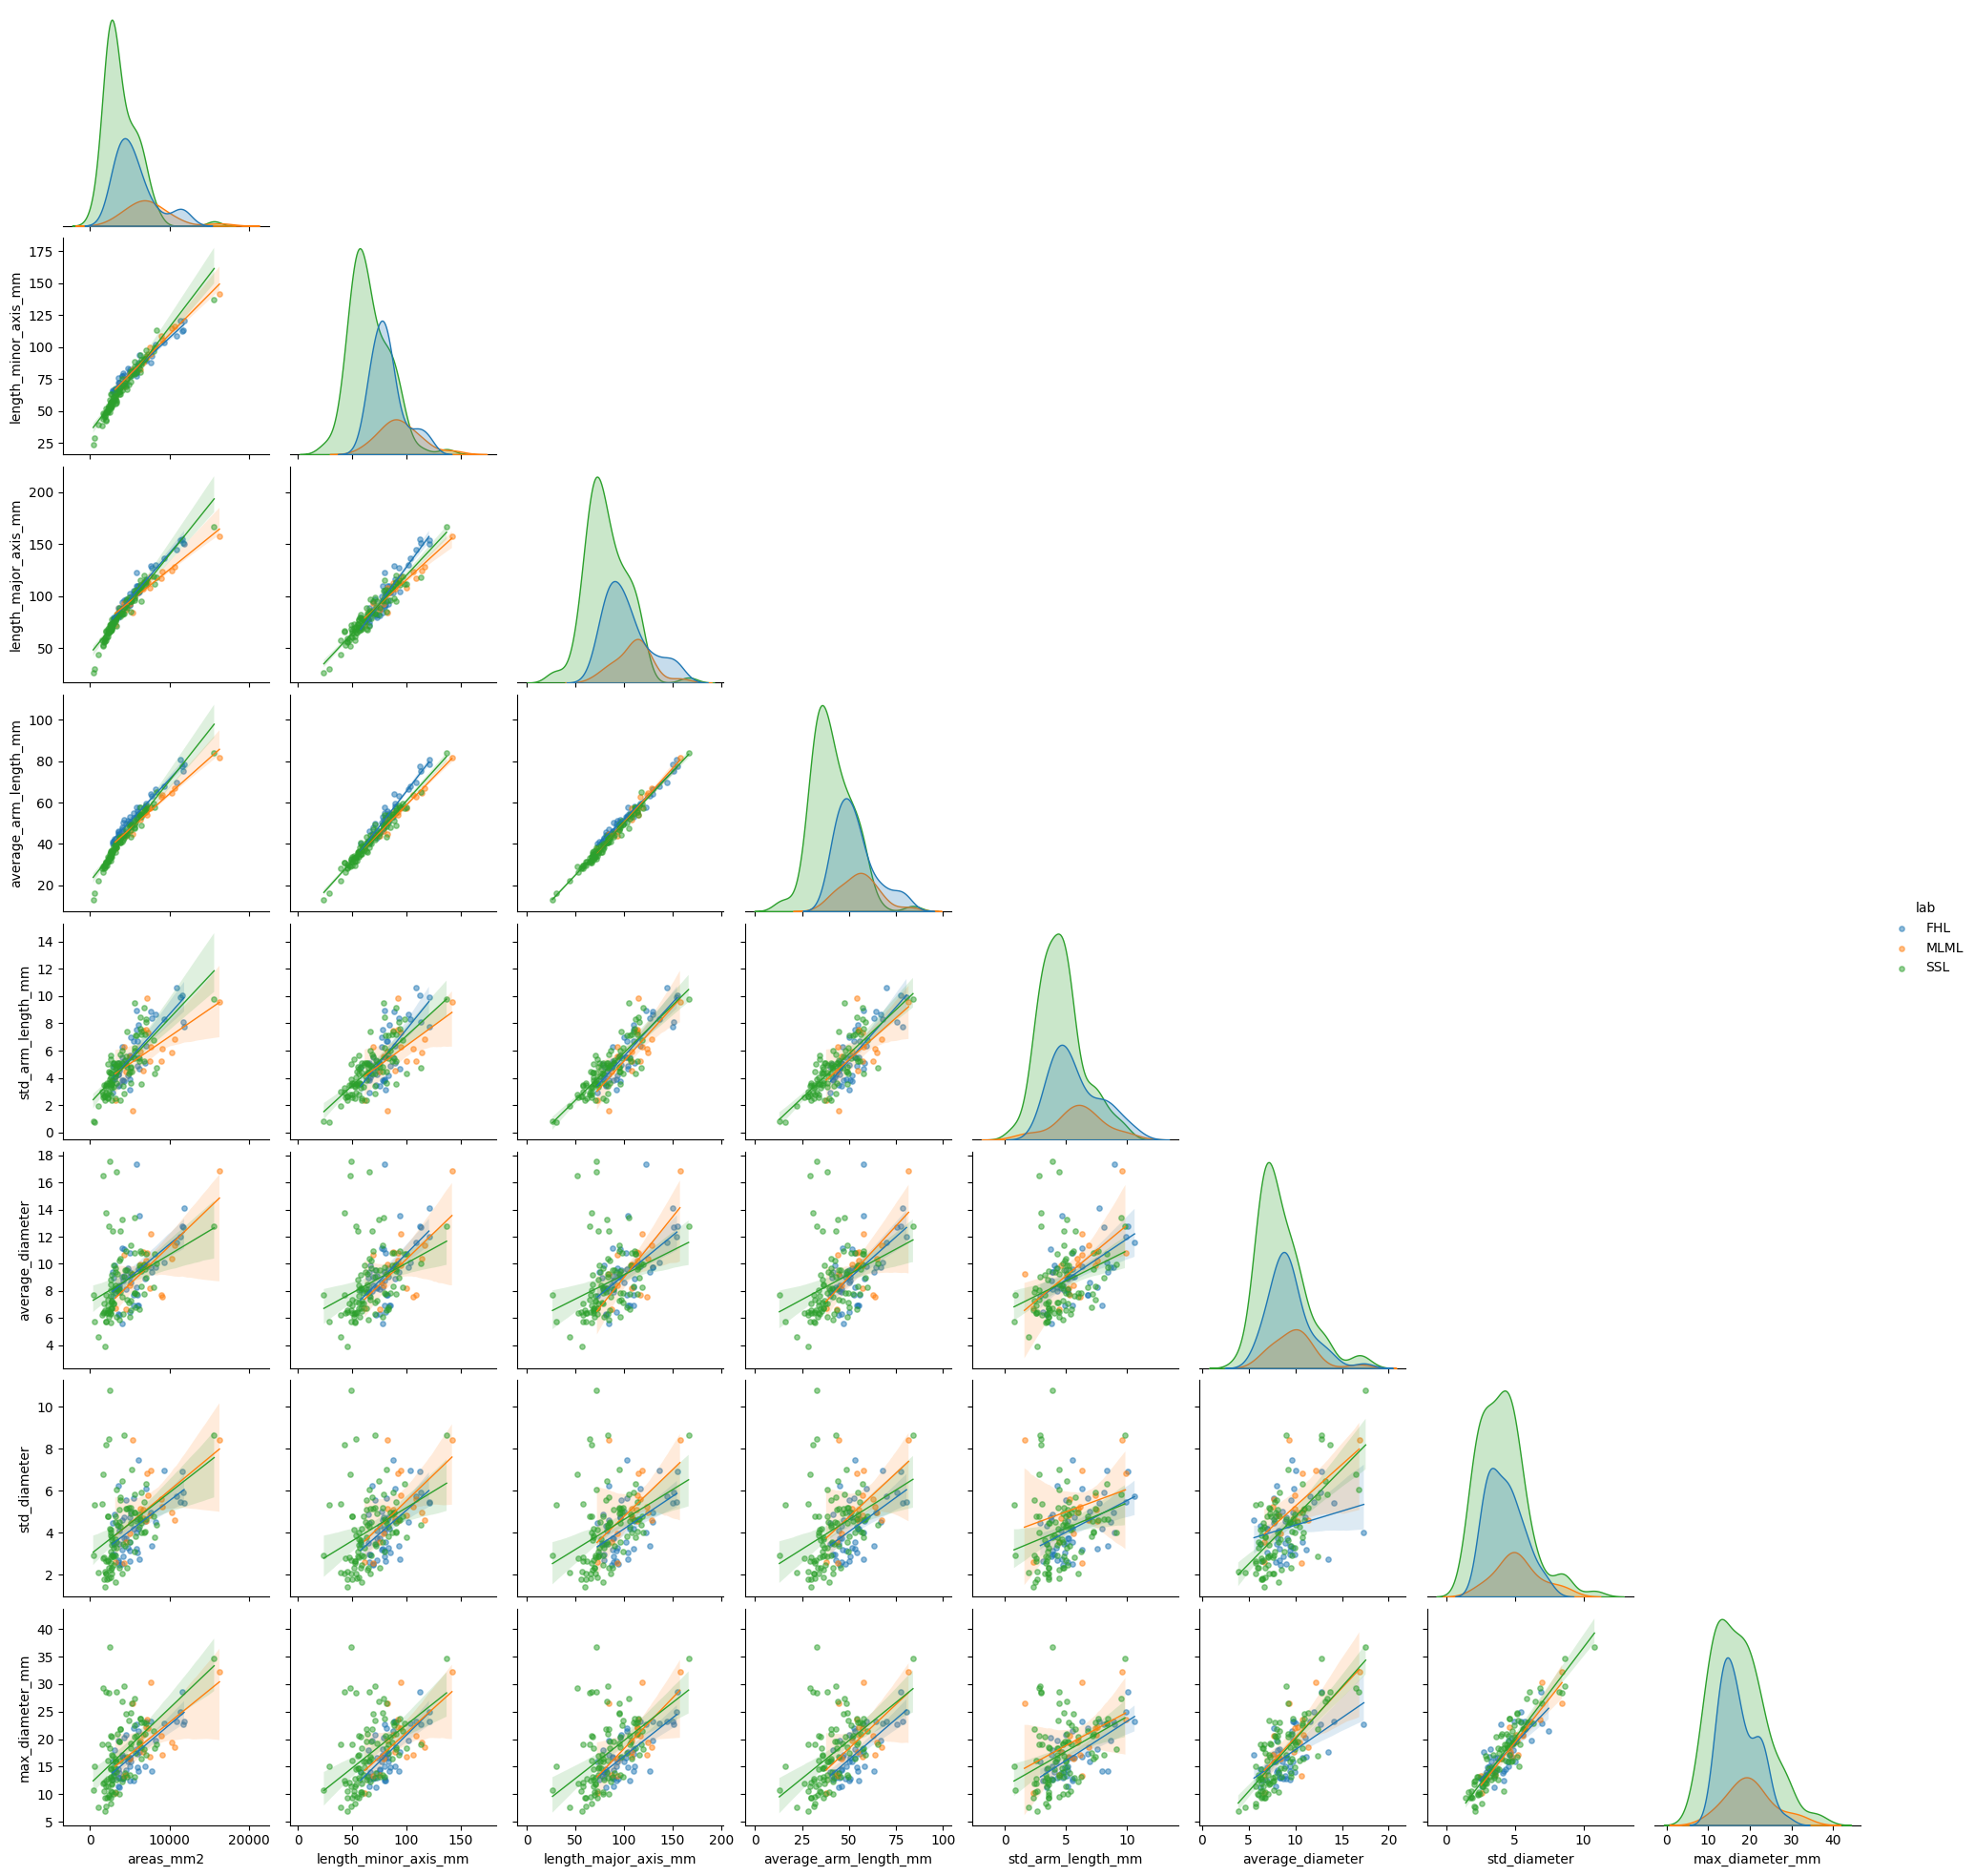

In [ ]:
numeric_cols = [str(col) for col in data.columns[4:]]
sns.pairplot(
    data[numeric_cols + ['lab']],   # include lab for hue
    hue='lab',
    kind='reg',
    diag_kind='kde',
    corner=True,
    plot_kws={
        "scatter_kws": {"s": 15, "alpha": 0.5},  # smaller points, semi-transparent
        "line_kws": {"linewidth": 1}             # thinner regression lines
    }
)
plt.show()

FHL


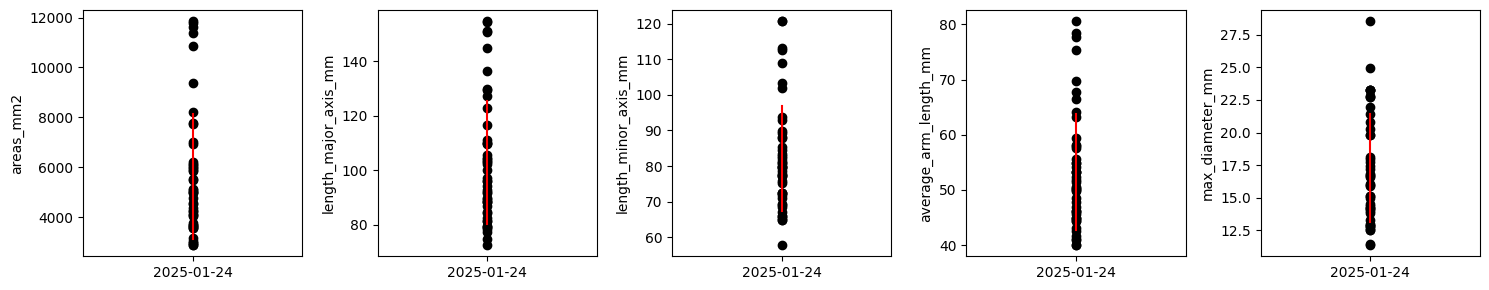

MLML


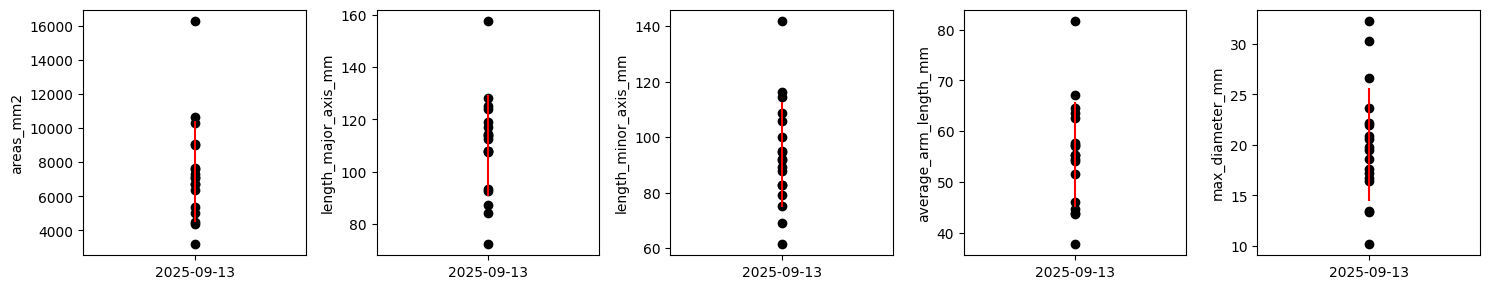

SSL


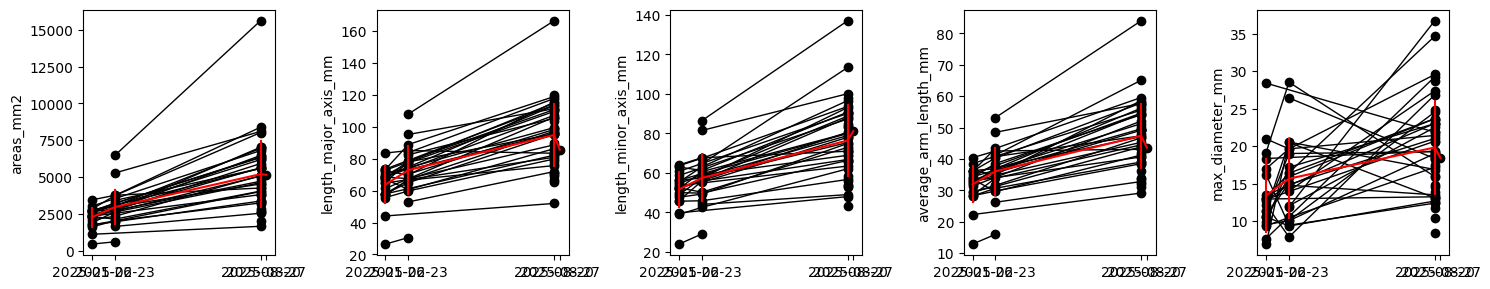

In [ ]:
def plot_morphometric_parameter_by_date (ax, data, feature):
    xticks = []
    unique_dates = sorted(data['measurement_day'].unique())
    mean_value, std_value = [], []
    for date in unique_dates:
        xticks.append(date)
        tmp = data[data['measurement_day'] == date]
        values = tmp[feature]
        mean_value.append(np.mean(values))
        std_value.append(np.std(values))
    for id in data['id'].unique():
        for date in unique_dates:
            tmp = data[(data['measurement_day'] == date) & (data['id'] == id)]
            if len(tmp) != 1:
                continue
            ax.scatter(date, tmp[feature], color='black')
        tmp = data[data['id'] == id]
        if len(tmp) > 1:
            ax.plot(tmp['measurement_day'], tmp[feature], color='black', linewidth=1)
    ax.set_xticks(xticks)
    ax.set_ylabel(feature)
    
    ax.plot(unique_dates, mean_value, color='red')
    for date, mean, std in zip(unique_dates, mean_value, std_value):
        ax.plot([date, date], [mean-std, mean+std], color='red')

for name in measurement_dir_names:
    print(name)
    tmp = data[data['lab'] == name]

    fig, axs = plt.subplots(1,5,figsize=(15,3))
    
    plot_morphometric_parameter_by_date (axs[0], tmp, 'areas_mm2')
    plot_morphometric_parameter_by_date (axs[1], tmp, 'length_major_axis_mm')
    plot_morphometric_parameter_by_date (axs[2], tmp, 'length_minor_axis_mm')
    plot_morphometric_parameter_by_date (axs[3], tmp, 'average_arm_length_mm')
    plot_morphometric_parameter_by_date (axs[4], tmp, 'max_diameter_mm')
    
    fig.tight_layout()
    plt.show()

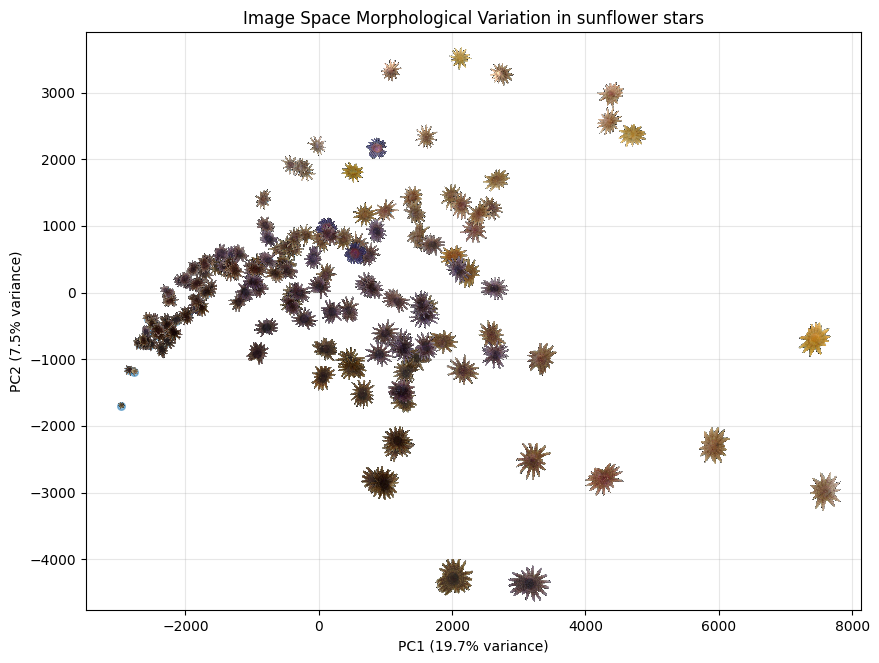

In [162]:
from src.starMorphometricTool.utils.visualization_utils import visualize_pca_with_images

fig, ax, X_pca, pca = visualize_pca_with_images(
    normalized_objects,
    max_thumbnails=200,    # Show up to 200 images
    max_image_size=0.2,  # Thumbnails take up 3% of plot area max
    fig_size=(10,10),    # Figure dimensions
    alpha=0.9,            # Transparency
    marker_size=30,        # Size of the scatter points,
    min_dist_factor=0.02,
    title="Image Space Morphological Variation in sunflower stars"
)


Explained variance by principal components:
PC1: 91.64%
PC2: 6.65%

Component loadings:
                            PC1       PC2
areas_mm2              0.454568 -0.252881
length_minor_axis_mm   0.452300 -0.355194
length_major_axis_mm   0.463614  0.010005
average_arm_length_mm  0.460907 -0.180569
std_arm_length_mm      0.401771  0.881580


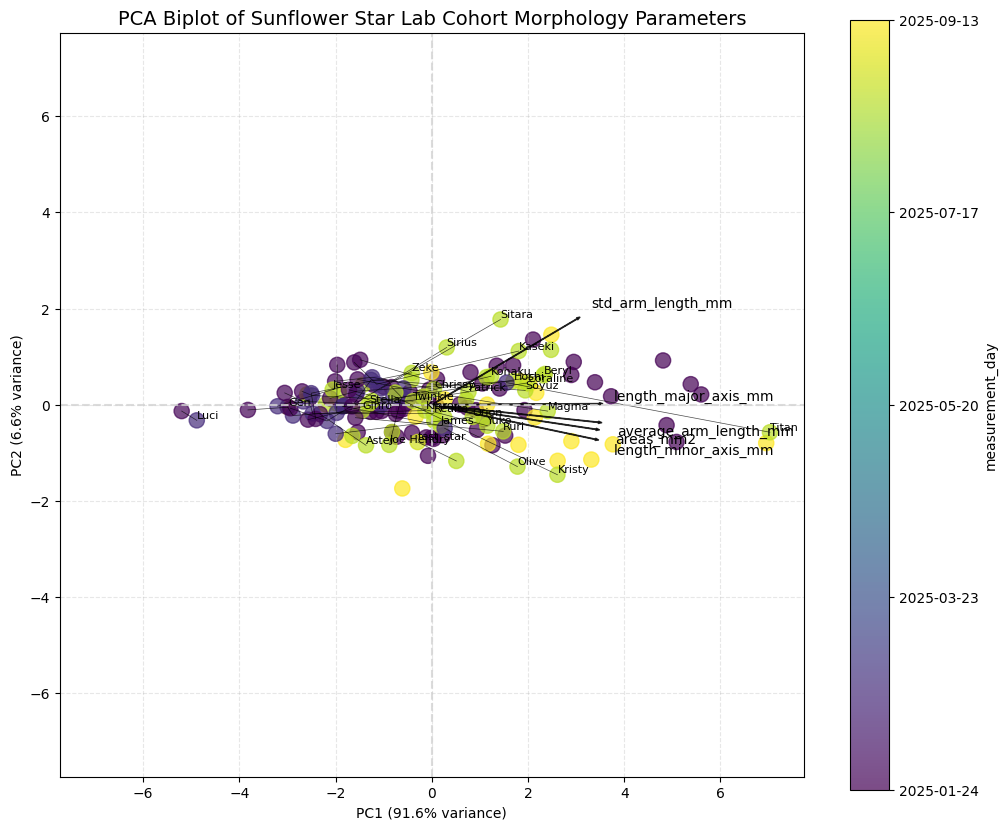

In [163]:
from src.starMorphometricTool.utils.morphology_pca import (compute_morphology_pca, create_pca_biplot)

# Select the features you want to include in the PCA
features = ['areas_mm2', 'length_minor_axis_mm', 'length_major_axis_mm', 
           'average_arm_length_mm', 'std_arm_length_mm']
# Compute the PCA
pca_df, pca_model, scaler, feature_names = compute_morphology_pca(data, columns=features)

# Create the biplot
fig, ax = create_pca_biplot(
    pca_df=pca_df,
    pca_model=pca_model,
    feature_names=feature_names,
    color_by='measurement_day',
    connect_by='id',              # Connect points with the same ID (was marker_by)
    title="PCA Biplot of Sunflower Star Lab Cohort Morphology Parameters",
    scaling=0.5,                  # Scale the arrows
    arrow_scale=7,                # Further scale up arrows
    arrow_color='black',          # All arrows are black
    marker_size=120,              # Larger markers
    line_color='black',           # Color for connecting lines
    line_width=0.5                # Thin lines connecting points
)

In [ ]:

for lab in measurement_dir_names:
    print(f'{lab}')
    tmp = data[data['lab'] == lab]

    latest_day = tmp['measurement_day'].max()
    print(f'last measurement day {latest_day}')


FHL
last measurement day 2025-01-24 00:00:00
MLML
last measurement day 2025-09-13 00:00:00
SSL
last measurement day 2025-08-27 00:00:00


In [ ]:
rank_value = 'areas_mm2'

# Ensure types
data['measurement_day'] = pd.to_datetime(data['measurement_day'], errors='coerce')
data[rank_value] = pd.to_numeric(data[rank_value], errors='coerce')

# Keep the most recent row per (lab, id)
# (add 'timestamp' below if you have it as a tie-breaker)
last_per_id = (
    data
      .sort_values(['lab', 'id', 'measurement_day'])             # oldest -> newest within each (lab,id)
      .drop_duplicates(subset=['lab', 'id'], keep='last')         # keep the latest row per (lab,id)
      .reset_index(drop=True)
)

# Rank **within each lab** (highest value = rank 1)
last_per_id['rank_in_lab'] = (
    last_per_id
        .groupby('lab')[rank_value]
        .rank(ascending=False, method='dense')
        .astype('Int64')
)
last_per_id

,lab,id,measurement_day,morphometrics_path,areas_mm2,length_minor_axis_mm,length_major_axis_mm,average_arm_length_mm,std_arm_length_mm,average_diameter,std_diameter,max_diameter_mm,rank_in_lab
0,FHL,sp1,2025-01-24,../../measurements/FHL/knownID\sp1\01_24_2025\...,2877.735604,65.437183,74.939226,41.190542,3.864038,9.386207,2.944342,12.699714,47
1,FHL,sp10,2025-01-24,../../measurements/FHL/knownID\sp10\01_24_2025...,3650.190893,72.562804,79.552298,43.024704,4.275273,8.257392,2.673303,12.929795,38
2,FHL,sp11,2025-01-24,../../measurements/FHL/knownID\sp11\01_24_2025...,7721.929953,88.158837,129.406308,64.171067,8.851505,9.727719,4.977552,23.290529,9
3,FHL,sp12,2025-01-24,../../measurements/FHL/knownID\sp12\01_24_2025...,3056.115446,66.951981,79.342698,42.597592,4.044154,9.903227,2.957527,14.001331,43
4,FHL,sp13,2025-01-24,../../measurements/FHL/knownID\sp13\01_24_2025...,5067.563204,80.734293,102.416130,53.175476,5.509753,10.769522,3.539342,16.649776,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,SSL,Twinkle,2025-08-20,../../measurements/SSL/knownID\Twinkle\08_20_2...,4012.965502,74.857530,82.264586,43.877256,5.066277,13.253458,6.467728,26.855240,33
109,SSL,Yang,2025-08-20,../../measurements/SSL/knownID\Yang\08_20_2025...,3363.456643,65.812671,71.368257,38.444523,4.410476,16.767051,6.055202,28.661516,38
110,SSL,Yuko,2025-08-20,../../measurements/SSL/knownID\Yuko\08_20_2025...,6182.381653,87.253390,107.209576,54.598386,5.197829,9.887089,4.859043,19.328771,14
111,SSL,Zeke,2025-08-20,../../measurements/SSL/knownID\Zeke\08_20_2025...,4041.479227,66.297017,86.314891,41.241266,5.968315,7.531484,2.037077,12.394757,32


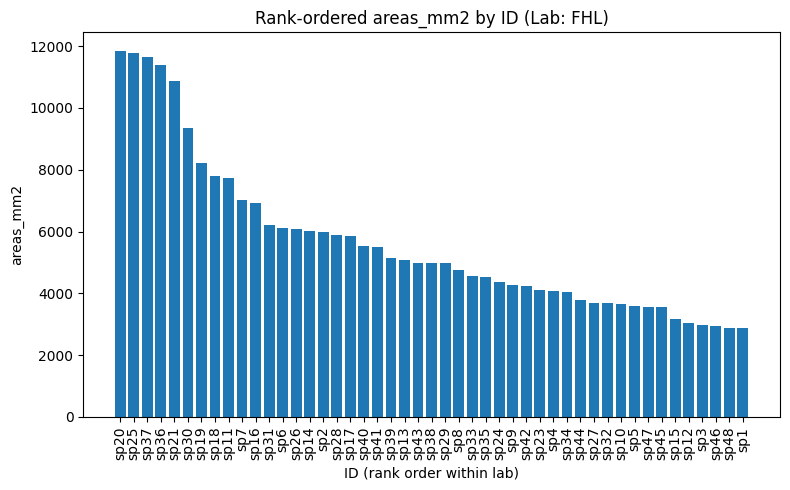

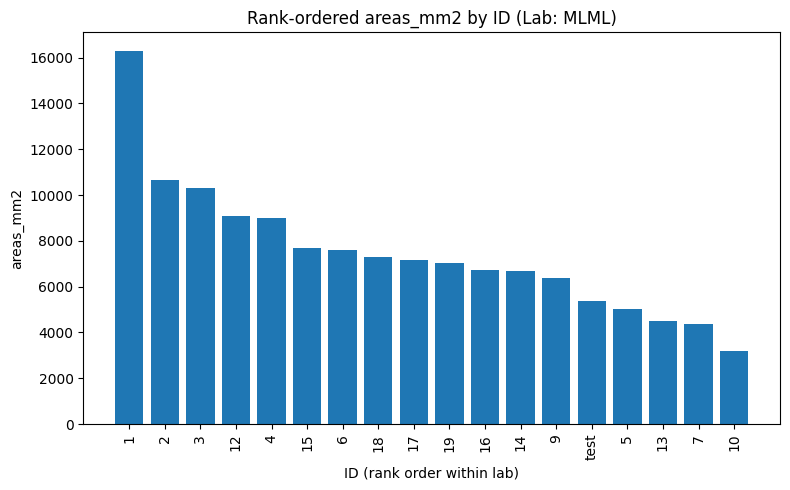

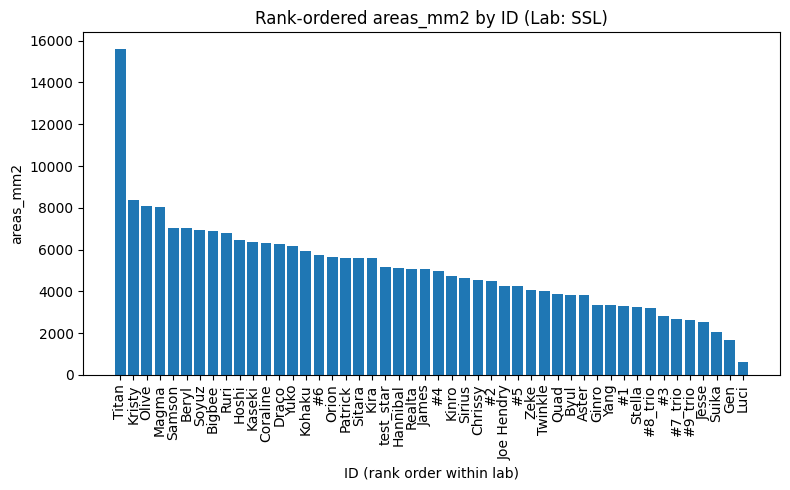

In [ ]:

for lab in measurement_dir_names:
    tmp = (last_per_id[last_per_id['lab'] == lab]
           .sort_values('rank_in_lab'))  

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(tmp['id'].astype(str), tmp[rank_value])
    ax.set_title(f"Rank-ordered {rank_value} by ID (Lab: {lab})")
    ax.set_xlabel("ID (rank order within lab)")
    ax.set_ylabel(rank_value)
    ax.set_xticks(range(len(tmp)))
    ax.set_xticklabels(tmp['id'].astype(str), rotation=90)
    plt.tight_layout()
    plt.show()
    plt.close()
    